# Relatório do TP1 de RI

#### Alunos:    
 - Alexandre Luis Ribeiro Martins
 - Diego Santos Gonçalves
 - Gabriel Arrighi Silva

### Principais desafios, decisões e arquitetura utilizada


O coletor foi desenvolvido com base no repositório público fornecido pelo professor Daniel Hasan Dalip. Os principais desafios encontrados foram os seguintes:


 - Detalhes em alguns testes: Para algumas etapas em específico, o teste automatizado possuía alguns problemas que impossibilitavam garantir o bom funcionamento do coletor. Para essas etapas, foi necessário avaliar e corrigir os testes.
 - Coordenação entre threads: Durante a etapa final, foi necessário debugar e corrigir detalhes no código que só ficava evidente ao testar por meio da execução de diversas threads, em alguns momentos o código ficava em loop e, em outros, coletava menos do que deveria. A solução foi encontrada após depurar o código e identificar detalhes nas etapas anteriores que não tinham sido implementados como deveriam.
 - Criação da página de documentação: Houve um certo desafio na decisão de qual plataforma utilizar para a página. Por fim, a solução mais simples e barata foi utilizar o github.io.


A maior parte das decisões tomadas seguem o modelo padrão do projeto esperado. Alguns detalhes foram:
 - Diminuímos o tempo de espera ao ficar sem novos domínios para coletar para 1 segundo, visto que o valor utilizado (30s) era desnecessário.
 - Decidimos utilizar None na resposta de exceção do `request_url`
A arquitetura utilizada segue a arquitetura padrão do projeto, com a diferença que, no método run do `page_fetcher`, utilizamos um loop dentro de um bloco de exceção, para evitar que uma falha crítica em uma thread interrompa o trabalho das demais. Além disso, foi utilizada a estrutura padrão fornecida, com as classes `Scheduler` e `PageFetcher` com suas funções atribuídas e a chamada para execução dentro do notebook fornecido. Maiores detalhes da implementação se encontram no item 3 deste relatório. 


### URLs sementes utilizadas

Para a coleta, foram selecionadas as seguintes URLs sementes:

 - [https://www.terra.com.br ](https://www.terra.com.br )
 - [https://www.uol.com.br](https://www.uol.com.br) 
 - [https://www.canaltech.com.br](https://www.canaltech.com.br) 
 - [https://www.casasbahia.com.br](https://www.casasbahia.com.br) 

### Como foi feito, faça referências à classes e métodos do código fonte:

Inicialmente, temos a classe `Domain` que representa os domínios do sistema. Cada servidor será representado por um domínio e as funções da classe irão controlar o tempo de requisição de acesso. A classe `Scheduler`, o escalonador, percorrerá a lista de servidores e obterá as URLs dos servidores acessíveis, controlando a fila. Por fim, foi implementada a classe `PageFetcher`, que controlam as threads responsáveis por fazer as requisições das URLs vindas do `Scheduler`.  

 - Os critérios de exclusão de robôs e quantidade de tempo entre requisições à um mesmo servidor:

O critério de exclusão de robôs foi implementado na Classe `Scheduler`, no método `can_fetch_page`. Nesse método, foi utilizado o módulo de `robotparser` da `urllib`, que estabelece as regras de exclusão de robôs de acordo com o arquivo `robots.txt`. Há um dicionário de configuração do `robots.txt` em que a chave é o cada domínio novo descoberto. Então, para validar a URL, verifica-se no item do dicionário cuja chave é o domínio da URL e chama o método `can_fetch`.

A quantidade de tempo entre as requisições a um mesmo servidor foi implementada na Classe `Scheduler`, e o tempo do intervalo é armazenado no atributo `TIME_LIMIT_BETWEEN_REQUESTS` em milisegundos. No método `get_next_url`, esse limite de tempo também é utilizado caso o dicionário de URL descobertas for vazia.

### O impacto na velocidade de coleta, a quantidade de páginas por segundo, aumenta o número de threads de 1 a 20 de 5 em 5 passos e, logo após, de 30 a 100 com 20 passos . Ao fazer o estudo, colete menos páginas (~100 páginas visitadas pode ser o suficiente).

In [ ]:
from crawler.scheduler import Scheduler
from crawler.page_fetcher import PageFetcher
from urllib.parse import urlparse
import time

arr_seeds = ["https://www.crunchyroll.com/pt-br/welcome",
             "https://animesonline.cc/tv/",
             "https://www.anitube.site/",
             "https://animesbr.biz/",
             "https://xpanimes.com/",
             "https://animefire.net/",
             "https://animesonline.org/",
             "https://meusanimes.net/"]

arr_seeds = [urlparse(str_url) for str_url in arr_seeds]

arr_results = []

def test_crawler(num_threads):

    scheduler = Scheduler(usr_agent="OtakuBot (https://allrightishere.github.io/OtakuBot/)", page_limit=100, depth_limit=10, arr_urls_seeds=arr_seeds)

    arr_fetcher = []

    start = time.time()
    for i in range(num_threads):
        arr_fetcher.append(PageFetcher(scheduler))
        arr_fetcher[i].start()


    for fetcher in arr_fetcher:
        fetcher.join()
    end = time.time()

    interval = end - start

    arr_results.append((num_threads, interval))

arr_threads = [ x*5 for x in range(4)]
arr_threads[0] = 1

arr_threads += [ x*20+30 for x in range(4)]
arr_threads.append(100)

for t in arr_threads:
    test_crawler(t)

No gráfico abaixo temos o tempo (Y) em função da quantidade de thread (X)  
Perceba como o tempo se torna ótimo em 15 threads, o que é esperado tendo em vista que o experimento foi realizado em um computador com 16 threads

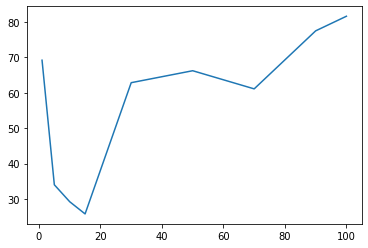

In [5]:
import matplotlib.pyplot as plt

x_coords = [coord[0] for coord in arr_results]
y_coords = [coord[1] for coord in arr_results]

plt.plot(x_coords, y_coords)
plt.show()

In [6]:
arr_results

[(1, 69.21334671974182),
 (5, 34.02937865257263),
 (10, 29.24563717842102),
 (15, 25.802207946777344),
 (30, 62.86678504943848),
 (50, 66.24265432357788),
 (70, 61.11985111236572),
 (90, 77.50614619255066),
 (100, 81.63150835037231)]

### Link da página

O coletor ciado possui uma página documentativa que é utilizada no User-Agent durante as coletas, a página pode ser vista através do link: 
[https://allrightishere.github.io/OtakuBot/](https://allrightishere.github.io/OtakuBot/) .
